# Taylorentwicklung

In [1]:
from sympy import *
init_printing()

import numpy as np
import matplotlib.pyplot as plt

Die Taylornäherung der Funktion $f(x)$ um den Punkt $x_0$ ist definiert als

$$
Tf(x;x_0) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x-x_{0})^n
.$$
---

Wir definieren daher zunächst eine Funktion in Python für $n!$:

In [2]:
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n-1)

Wir berechnen nun die einzelnen Elemente der Summe, die Stücke des Polynoms und addieren sie nach und nach auf mit

In [3]:
def taylor(function,x0,n):
    i = 0
    Polynom = 0
    while i <= n:
        Polynom = Polynom + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return Polynom

Wir definieren nun zu nächst die Funktion mit ihren Variablen, die wir nähern wollen und ... nähern sie:

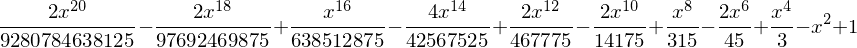

In [4]:
x = Symbol("x")
f = cos(x)**2

# Spuck die Näherung aus
taylor(f,0,20)

Diese Näherung gilt mit minimalem Fehler um den Entwicklungspunkt $x_0$. 

In [5]:
#print(taylor(f,0,20))

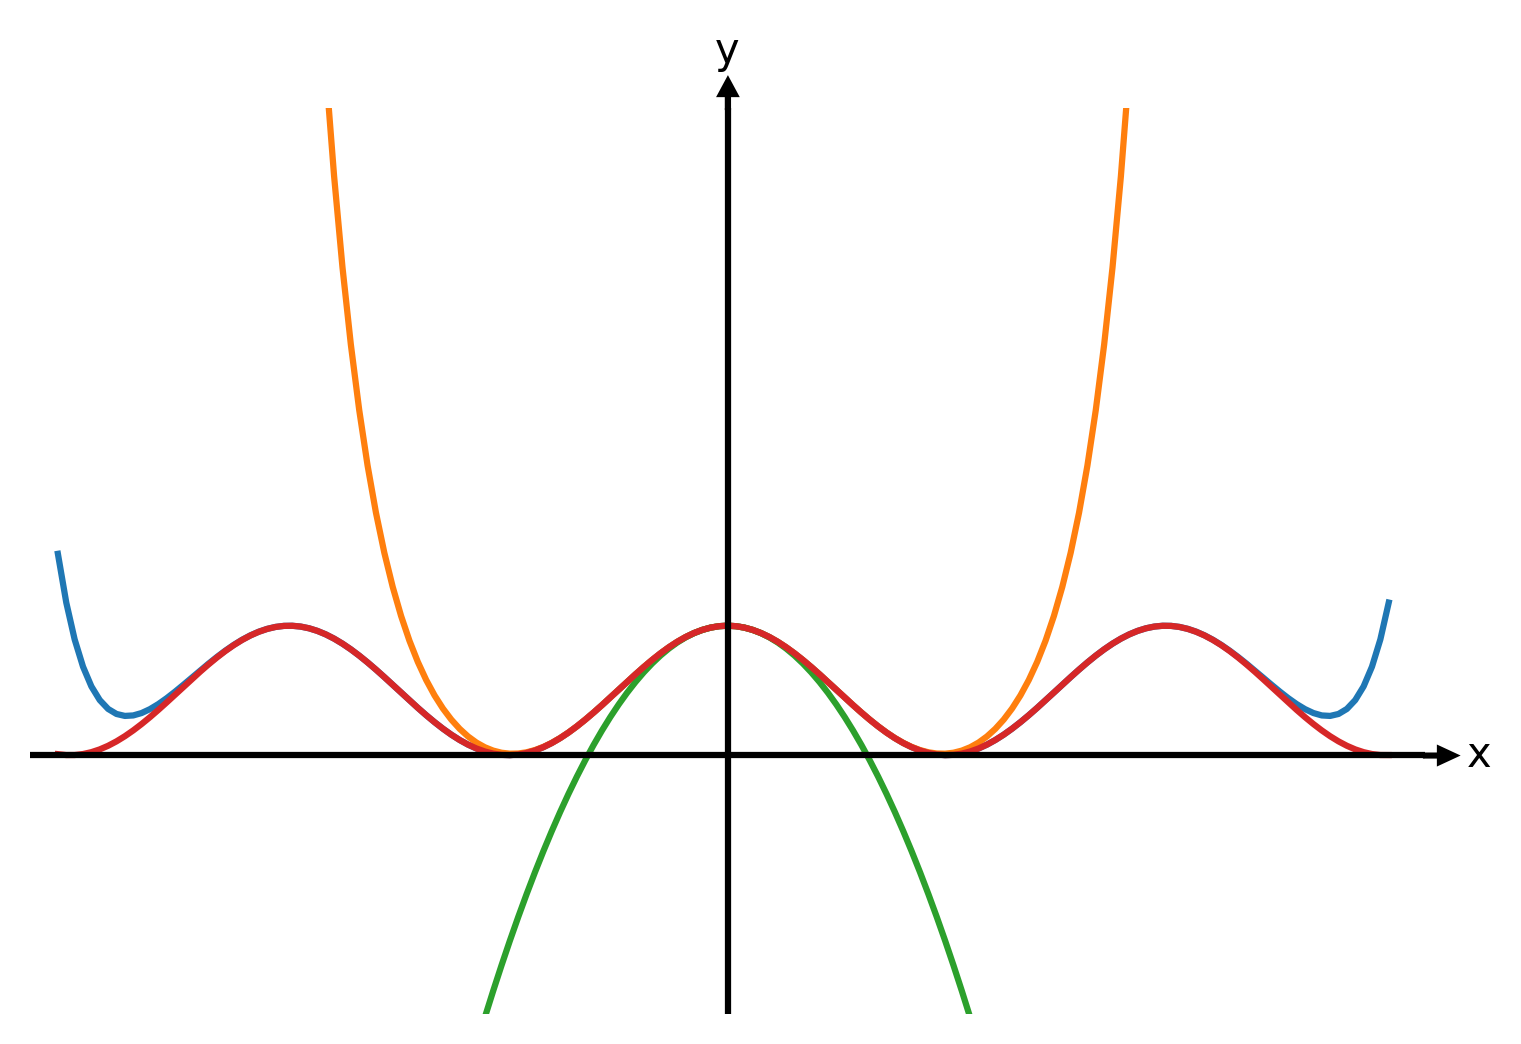

In [7]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib.transforms import BlendedGenericTransform
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy

fig = plt.figure(1, dpi=300)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
fig.patch.set_facecolor('white')

y = np.arange(-4.8,4.8,0.06)

# Taylorpolynome
T4 = -y**2 + 1
T10 = y**8/315 - 2*y**6/45 + y**4/3 - y**2 + 1
T20 = 2*y**20/9280784638125 - 2*y**18/97692469875 + y**16/638512875 - 4*y**14/42567525 + 2*y**12/467775 - 2*y**10/14175 + y**8/315 - 2*y**6/45 + y**4/3 - y**2 + 1
ax.plot(y,T20, "-")
ax.plot(y, T10, "-")
ax.plot(y, T4, "-")

# eigentliche Funktion
ax.plot(y, np.cos(y)**2)

# Plotachsenstriche
ax.axhline(linewidth=1.5, color="k")
ax.axvline(linewidth=1.5, color="k")
# Zeige Namen der Achsen
ax.text(0, 1.05, "y", transform=BlendedGenericTransform(ax.transData, ax.transAxes), ha='center')
ax.text(1.03, 0, "x", transform=BlendedGenericTransform(ax.transAxes, ax.transData), va='center')
# Entferne den Rand des Plots
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)
# x- und y-Achsen Limits
plt.ylim(-2, 5)
plt.xlim(-5, 5)
# Positioniere Pfeile für x- und y-Achse
plt.arrow(5, -0.003, 0.1, 0, width=0.015, color="k", clip_on=False, head_width=0.12, head_length=0.12)
plt.arrow(0.003, 5, 0, 0.1, width=0.015, color="k", clip_on=False, head_width=0.12, head_length=0.12)


---

Es gilt noch Fragen zu klären, wie:
+ **1. Was ist mit mehrdimensionalen Funktionen?**
+ **2. Was ist mit verketteten Funktionen?**